# PROJECT: USED CAR MARKET
**GIẢNG VIÊN HƯỚNG DẪN: THẦY TRẦN TRUNG KIÊN**  

**THÔNG TIN NHÓM 1:**
1. DIỆP ĐẠI THIỆN NHÂN - 18120491
2. PHẠM MINH SỸ - 18120540

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import copy
warnings.filterwarnings('ignore')

## Thu thập dữ liệu

- Tập dữ liệu mà nhóm lựa chọn là `used_car_sales`. Tập dữ liệu này thu thập thông tin về các loại xe qua sử dụng đã được bán. Nó bao gồm các thuộc tính name, year, selling_price, km_driven, fuel, seller_type, transmission, ower. Tập dữ liệu được thu thập từ trang `Kaggle` tại link sau [đây](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?fbclid=IwAR2RaMF8NWDYGPCl0sB9Y8HtpPx84xQDdDqlOPpypt0VzSNxRM_quWmlYGM) , license tại [đây](https://opendatacommons.org/licenses/dbcl/1-0/)
- Vì đây là dữ liệu trên `Kaggle` nên chúng ta chỉ cần đăng nhập là có thể lấy được dữ liệu này về một cách dễ dàng  

In [2]:
data = pd.read_csv("used-car-sales.csv")

## Khám phá dữ liệu (đan xen tiền xử lý)

In [3]:
data.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
#Kiểm tra trùng lặp
data.duplicated().sum()

763

In [5]:
#Xóa các dòng trùng
data.drop_duplicates(inplace=True)

In [6]:
data['name'].nunique()

1491

In [7]:
data['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [8]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [9]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [11]:
data['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

In [13]:
data["brand"] = data["name"].str.split(" ",expand=True)[0]
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


## Đặt câu hỏi

## Trả lời câu hỏi

Để trả lời câu hỏi 1, ta cần thực hiện các bước sau:
- Ta tính giá bán trung bình của các hãng xe
- Sắp xếp các giá trị trung bình
- Tìm 10 giá trị lớn nhất của cột giá trị trung bình đó
- Vẽ biểu đồ thể hiện

- Code bước 1:

In [14]:
brand_sold = data.groupby(["brand"])["selling_price"].mean()
brand_sold

brand
Ambassador       2.000000e+05
Audi             2.185452e+06
BMW              2.242800e+06
Chevrolet        2.327132e+05
Daewoo           6.000000e+04
Datsun           2.965517e+05
Fiat             2.870937e+05
Force            3.460000e+05
Ford             5.636272e+05
Honda            5.399444e+05
Hyundai          4.133406e+05
Isuzu            1.500000e+06
Jaguar           2.073000e+06
Jeep             1.530000e+06
Kia              1.300000e+06
Land             3.609800e+06
MG               1.842500e+06
Mahindra         5.847804e+05
Maruti           3.320312e+05
Mercedes-Benz    2.299238e+06
Mitsubishi       8.430000e+05
Nissan           4.570384e+05
OpelCorsa        8.850000e+04
Renault          4.084000e+05
Skoda            4.755510e+05
Tata             2.786724e+05
Toyota           8.389176e+05
Volkswagen       4.616666e+05
Volvo            2.556250e+06
Name: selling_price, dtype: float64

- Code bước 2:

In [15]:
brand_sold.sort_values(ascending=False,inplace=True)
brand_sold

brand
Land             3.609800e+06
Volvo            2.556250e+06
Mercedes-Benz    2.299238e+06
BMW              2.242800e+06
Audi             2.185452e+06
Jaguar           2.073000e+06
MG               1.842500e+06
Jeep             1.530000e+06
Isuzu            1.500000e+06
Kia              1.300000e+06
Mitsubishi       8.430000e+05
Toyota           8.389176e+05
Mahindra         5.847804e+05
Ford             5.636272e+05
Honda            5.399444e+05
Skoda            4.755510e+05
Volkswagen       4.616666e+05
Nissan           4.570384e+05
Hyundai          4.133406e+05
Renault          4.084000e+05
Force            3.460000e+05
Maruti           3.320312e+05
Datsun           2.965517e+05
Fiat             2.870937e+05
Tata             2.786724e+05
Chevrolet        2.327132e+05
Ambassador       2.000000e+05
OpelCorsa        8.850000e+04
Daewoo           6.000000e+04
Name: selling_price, dtype: float64

- Code bước 3:

In [17]:
top_10_most_value = brand_sold[:10]
top_10_most_value

brand
Land             3.609800e+06
Volvo            2.556250e+06
Mercedes-Benz    2.299238e+06
BMW              2.242800e+06
Audi             2.185452e+06
Jaguar           2.073000e+06
MG               1.842500e+06
Jeep             1.530000e+06
Isuzu            1.500000e+06
Kia              1.300000e+06
Name: selling_price, dtype: float64

- Code bước 4:

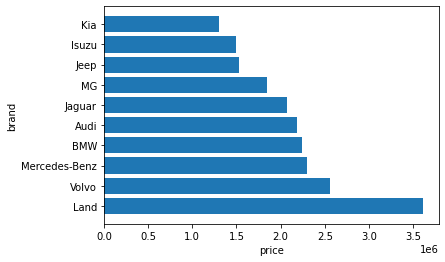

In [22]:
y = top_10_most_value.index
x = top_10_most_value
plt.barh(y,x)
plt.xlabel("price")
plt.ylabel("brand")
plt.show()

Để trả lời câu hỏi 2, ta cần thực hiện các bước sau:

- Ta tính tổng số lượng của các hãng xe và sắp xếp
- Tìm 10 giá trị lớn nhất của cột đó
- Vẽ biểu đồ thể hiện

- Code bước 1:

In [19]:
num_brand = data["brand"].value_counts()
num_brand

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Land                5
Mitsubishi          5
Volvo               4
Ambassador          3
Jeep                3
OpelCorsa           2
MG                  2
Daewoo              1
Isuzu               1
Kia                 1
Force               1
Name: brand, dtype: int64

- Code bước 2:

In [20]:
top_10_most_sold = num_brand[:10]
top_10_most_sold

Maruti        1072
Hyundai        637
Mahindra       328
Tata           308
Ford           220
Honda          216
Toyota         170
Chevrolet      151
Renault        110
Volkswagen      93
Name: brand, dtype: int64

- Code bước 3:

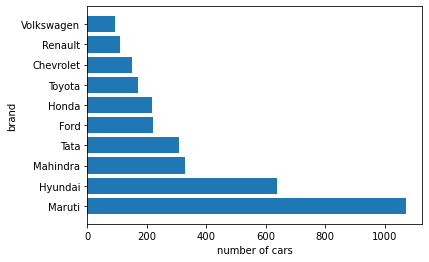

In [23]:
y = top_10_most_sold.index
x = top_10_most_sold
plt.barh(y,x)
plt.xlabel("number of cars")
plt.ylabel("brand")
plt.show()